# Credit Card Customer Segmentation

<p style="text-align:center;">
  <img src="https://images.unsplash.com/photo-1588286492514-ddb61b527086?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=870&q=80" width="800" height="300">
  <br>
  Source: <a href="https://unsplash.com/photos/xKmXZ4Fv63w/">Unsplash</a>
</p>

The dataset contains information about the company’s clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

Luckily, the data engineering team has already cleaned most of the data so we can focus on building the best possible model to segment the data. Also, in a planning meeting with the Data Science coordinator, it was decided that we should use the K-means algorithm to segment the data.

The company expects to receive a group for each client and an explanation of the characteristics of each group and the main points that make them different.

In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

 - Analyze the dataset;
 - Prepare the data for modeling;
 - Find an appropriate number of clusters;
 - Segment the data;
 - Interpret and explain the results.
 
Here's the data dictionary:

- `customer_id`: unique identifier for each customer.
- `age`: customer age in years.
- `gender`: customer gender (M or F).
- `dependent_count`: number of dependents of each customer.
- `education_level`: level of education ("High School", "Graduate", etc.).
- `marital_status`: marital status ("Single", "Married", etc.).
- `estimated_income`: the estimated income for the customer projected by the data science team.
- `months_on_book`: time as a customer in months.
- `total_relationship_count`: number of times the customer contacted the company.
- `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
- `credit_limit`: customer's credit limit.
- `total_trans_amount`: the overall amount of money spent on the card by the customer.
- `total_trans_count`: the overall number of times the customer used the card.
- `avg_utilization_ratio`: daily average utilization ratio.

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\jdgoe\Downloads\customer_segmentation.csv")
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [4]:
df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


We have 3 categorical columns: gender, education level, and marital status. Let'd modify these into quantifiable values.

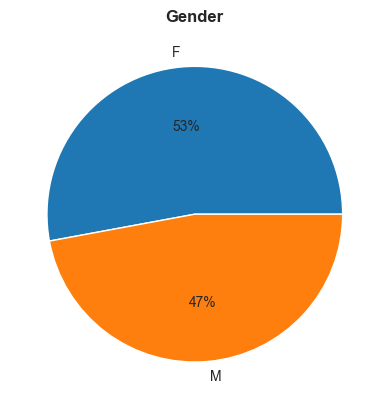

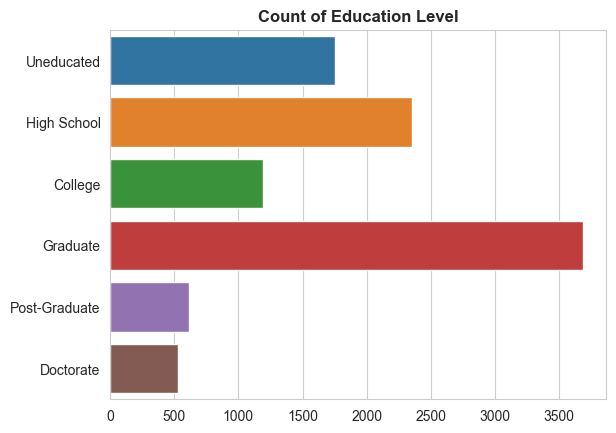

Text(0, 0.5, '')

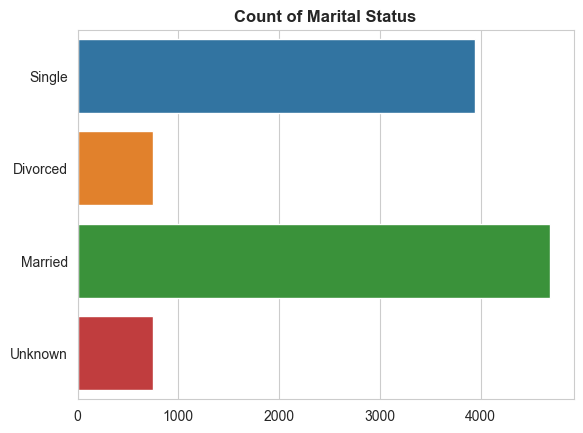

In [5]:
order=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']

df['gender'].value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.title('Gender', weight = 'bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

sns.countplot(data=df, y='education_level', order=order, orient='h')
plt.title('Count of Education Level', weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()


order=['Single', 'Divorced', 'Married', 'Unknown']
sns.countplot(data=df, y='marital_status', order=order,orient='h')
plt.title('Count of Marital Status', weight='bold')
plt.xlabel('')
plt.ylabel('')

## Feature Engineering

Need to convert catagorical data in the dataset into an useable form for the data model.  First will convert the values of the gender column to 1 for male and 0 for female.  Then will convert the education_level column to values between 0 to 5.

In [6]:
# Drop 'customer_id' from 'customers' dataframe
df_clean = df.drop('customer_id', axis=1)


In [7]:
customers_modif=df_clean.copy()
# replace 'M' in gender column with 1 and 'F' with 0
customers_modif['gender']=customers_modif['gender'].apply(lambda x: 1 if x=='M' else 0)

education_map={'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3,
              'Post-Graduate':4, 'Doctorate':5}

customers_modif['education_level']=customers_modif['education_level'].map(education_map)

customers_modif[['gender', 'education_level']].head(10)

,gender,education_level
0,1,1
1,0,3
2,1,3
3,0,1
4,1,0
5,1,3
6,1,1
7,1,1
8,1,0
9,1,3


Unlike the other two catagorical catagories, there is no order of magnitude between different statuses in marital_status. Converting these values using one-hot_encoding to dummy variables will make the data useable in the data model without conveying any magnitude.

In [8]:
marital_dummies=pd.get_dummies(customers_modif['marital_status'], prefix='marital', drop_first=False)
customers_modif=pd.concat([customers_modif, marital_dummies], axis=1)

customers_modif=customers_modif.drop(columns='marital_status')
customers_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10127 non-null  int64  
 1   gender                    10127 non-null  int64  
 2   dependent_count           10127 non-null  int64  
 3   education_level           10127 non-null  int64  
 4   estimated_income          10127 non-null  int64  
 5   months_on_book            10127 non-null  int64  
 6   total_relationship_count  10127 non-null  int64  
 7   months_inactive_12_mon    10127 non-null  int64  
 8   credit_limit              10127 non-null  float64
 9   total_trans_amount        10127 non-null  int64  
 10  total_trans_count         10127 non-null  int64  
 11  avg_utilization_ratio     10127 non-null  float64
 12  marital_Divorced          10127 non-null  uint8  
 13  marital_Married           10127 non-null  uint8  
 14  marita

In [9]:
customers_modif.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_Divorced,marital_Married,marital_Single,marital_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0


Customer_id is nominal data and would be useless for the data model and is unable to be used for any correlations. This column will be removed.

Now that all the features of the dataset have been converted to numerical values it is now possible to create a correlation heatmap to find which variables corrolate the strongest with each other.

Text(0.5, 1.0, "Pearson's correlation heatmap")

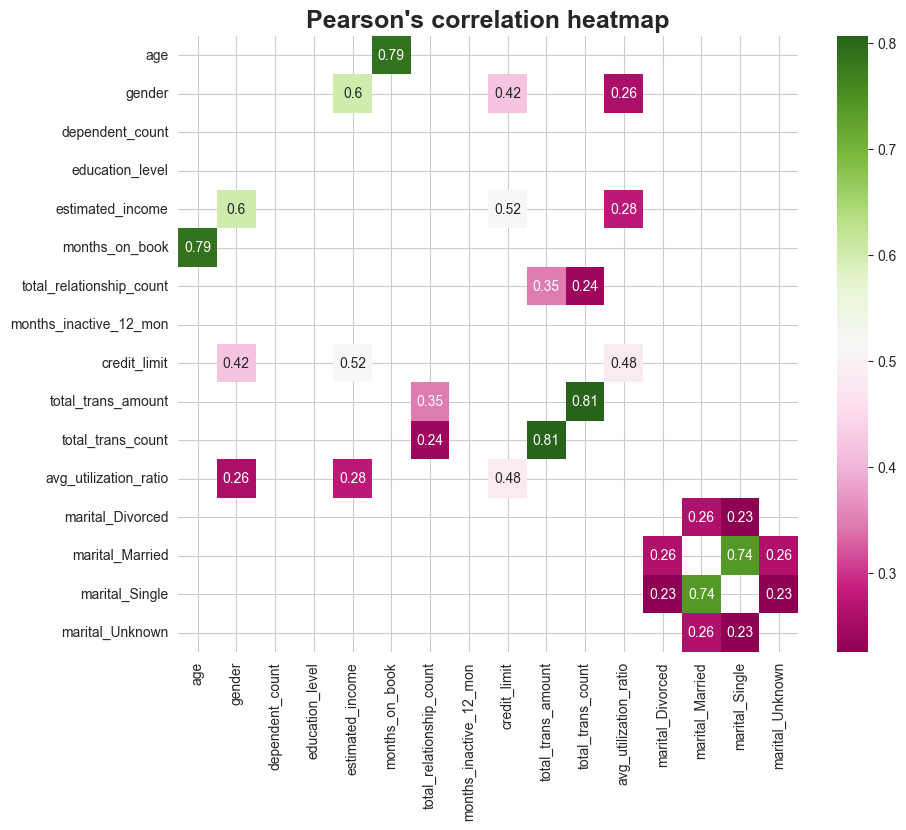

In [10]:
correlations=abs(customers_modif.corr())

# Create heatmap with only high correlation values to avoid overcrowding
# and increase readability.

plt.figure(figsize=(10,8))
sns.heatmap(correlations[(correlations>0.20)&(correlations<1)], cmap="PiYG", annot=True)
plt.title("Pearson's correlation heatmap", weight='bold', size=18)

## Scaling Data

Now that we have all data normalized as numerical, we need to scale the features so the ranges aren't vastly different

In [11]:
scaler=StandardScaler()
scaler.fit(customers_modif)
scaled_customers=scaler.transform(customers_modif)

scaled_customers

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])

In [12]:
scaled_customers = pd.DataFrame(scaled_customers, columns=customers_modif.columns)
print(scaled_customers)

            age    gender  dependent_count  education_level  estimated_income  \
0     -0.165406  1.059956         0.503368        -0.752211          0.175810   
1      0.333570 -0.943436         2.043199         0.662787         -0.967166   
2      0.583058  1.059956         0.503368         0.662787          0.785397   
3     -0.789126 -0.943436         1.273283        -0.752211         -0.636973   
4     -0.789126  1.059956         0.503368        -1.459710          0.074212   
...         ...       ...              ...              ...               ...   
10122  0.458314  1.059956        -0.266547         0.662787         -0.281380   
10123 -0.664382  1.059956        -0.266547         0.662787         -0.560775   
10124 -0.290150 -0.943436        -1.036462        -0.752211         -0.738571   
10125 -2.036565  1.059956        -0.266547         0.662787         -0.382978   
10126 -0.414894 -0.943436        -0.266547         0.662787         -0.662372   

       months_on_book  tota

# Choosing K

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

In [13]:
inertias=[]

for k in range(1, 11):
    model=KMeans(n_clusters=k, n_init=10)
    clusters=model.fit_predict(scaled_customers)
    inertias.append(model.inertia_)

We have obtained a list of inertias from 10 different clustering models. We will now use this list to plot the elbow curve, which will help us determine the optimal number of clusters to use in our segmentation.

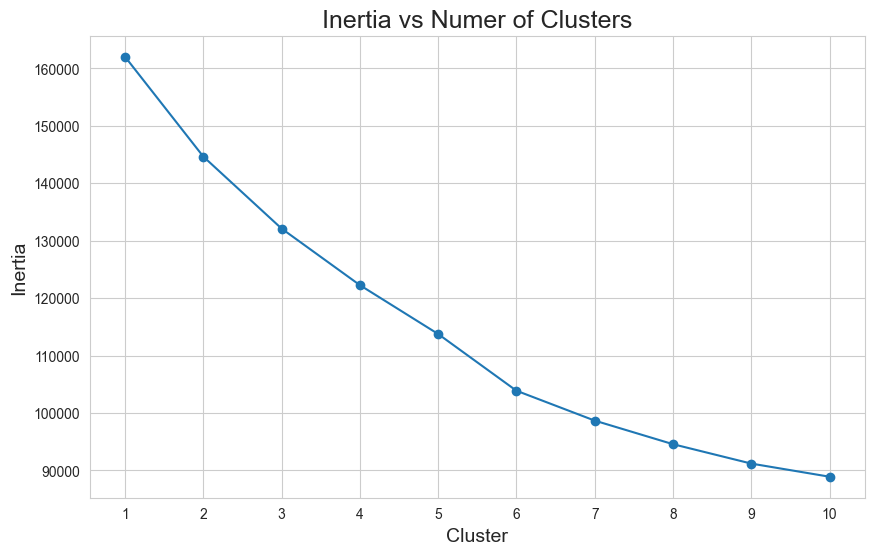

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(inertias)+1), inertias, marker='o')
plt.title('Inertia vs Numer of Clusters', size=18)
plt.ylabel('Inertia', size=14)
plt.xlabel('Cluster', size=14)
plt.xticks(ticks=range(1, len(inertias)+1))

plt.show()

In [15]:
# Empty list to store the percentage decrease in inertia
percentages = []

# Loop over number of K values from 1-10
for k in range(1, 11):
    model1 = KMeans(n_clusters=k, n_init=10)
    model2 = KMeans(n_clusters=k+1, n_init=10)
    clusters1 = model1.fit_predict(scaled_customers)
    clusters2 = model2.fit_predict(scaled_customers)
    inertia1 = model1.inertia_
    inertia2 = model2.inertia_
    percentage = (inertia1 - inertia2) / inertia1 * 100
    percentages.append(percentage)

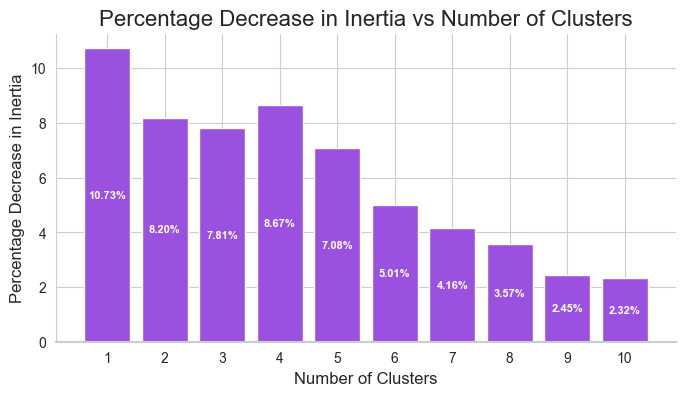

In [16]:
# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(8, 4))

# Create the bar chart
bars = ax.bar(range(1, len(percentages)+1), percentages, color='#9b51e0')

# Add labels and title
ax.set_title('Percentage Decrease in Inertia vs Number of Clusters', size=16)
ax.set_ylabel('Percentage Decrease in Inertia', size=12)
ax.set_xlabel('Number of Clusters', size=12)
ax.set_xticks(range(1, len(percentages)+1))

# Add percentage labels to the bars
for i, val in enumerate(percentages):
    ax.text(bars[i].get_x() + bars[i].get_width() / 2, 
            bars[i].get_height() / 2, 
            f'{val:.2f}%', 
            ha='center', 
            va='center', 
            color='white', 
            fontweight='bold',
            fontsize=8)
    
# Remove the top and right spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Set thicker x-axis line
ax.spines['bottom'].set_linewidth(1.5)

plt.show()

After analyzing the bar plot, we have observed that the rate of inertia decrease slows down significantly between 5 and 7 clusters. Consequently, we have decided to choose 6 clusters for our analysis.

To implement this decision, we will create a new KMeans object, this time with K=6.

In [17]:
model = KMeans(n_clusters=6, n_init=10)
clusters = model.fit_predict(scaled_customers)
print(clusters)

[0 2 0 ... 1 4 1]


# Analyzing Results

 We need to see how the variables used in the clusterization differ from cluster to cluster in order better explain what each cluster represents.

We should note the most important characteristics of each cluster and how they can impact the business and marketing strategies for each type of customer.

In [18]:
df['CLUSTER'] = clusters + 1
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,1
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,3
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,1
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,5
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,2


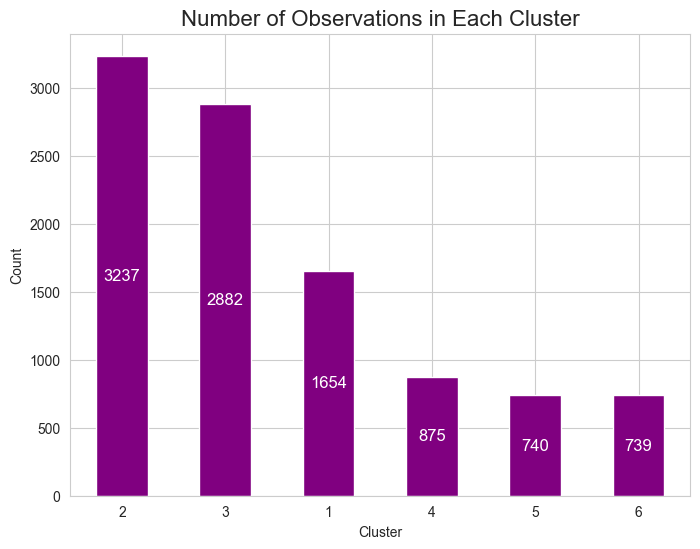

In [19]:
# Count the distribution of each cluster (1-6)
cluster_counts = df['CLUSTER'].value_counts()

# Create bar plot
ax = cluster_counts.plot(kind='bar', figsize=(8,6), color='purple')

# Set title and axis labels
ax.set_title('Number of Observations in Each Cluster', size=16)
ax.set_ylabel('Count')
ax.set_xlabel('Cluster')
plt.xticks(rotation=0)

# Add value labels to each bar
for i in ax.containers:
    ax.bar_label(i, label_type='center', fontsize=12, color='white')


plt.show()

In [30]:
cluster_counts_totals = cluster_counts / cluster_counts.sum()
print(cluster_counts_totals)

2    0.319641
3    0.284586
1    0.163326
4    0.086403
5    0.073072
6    0.072973
Name: CLUSTER, dtype: float64


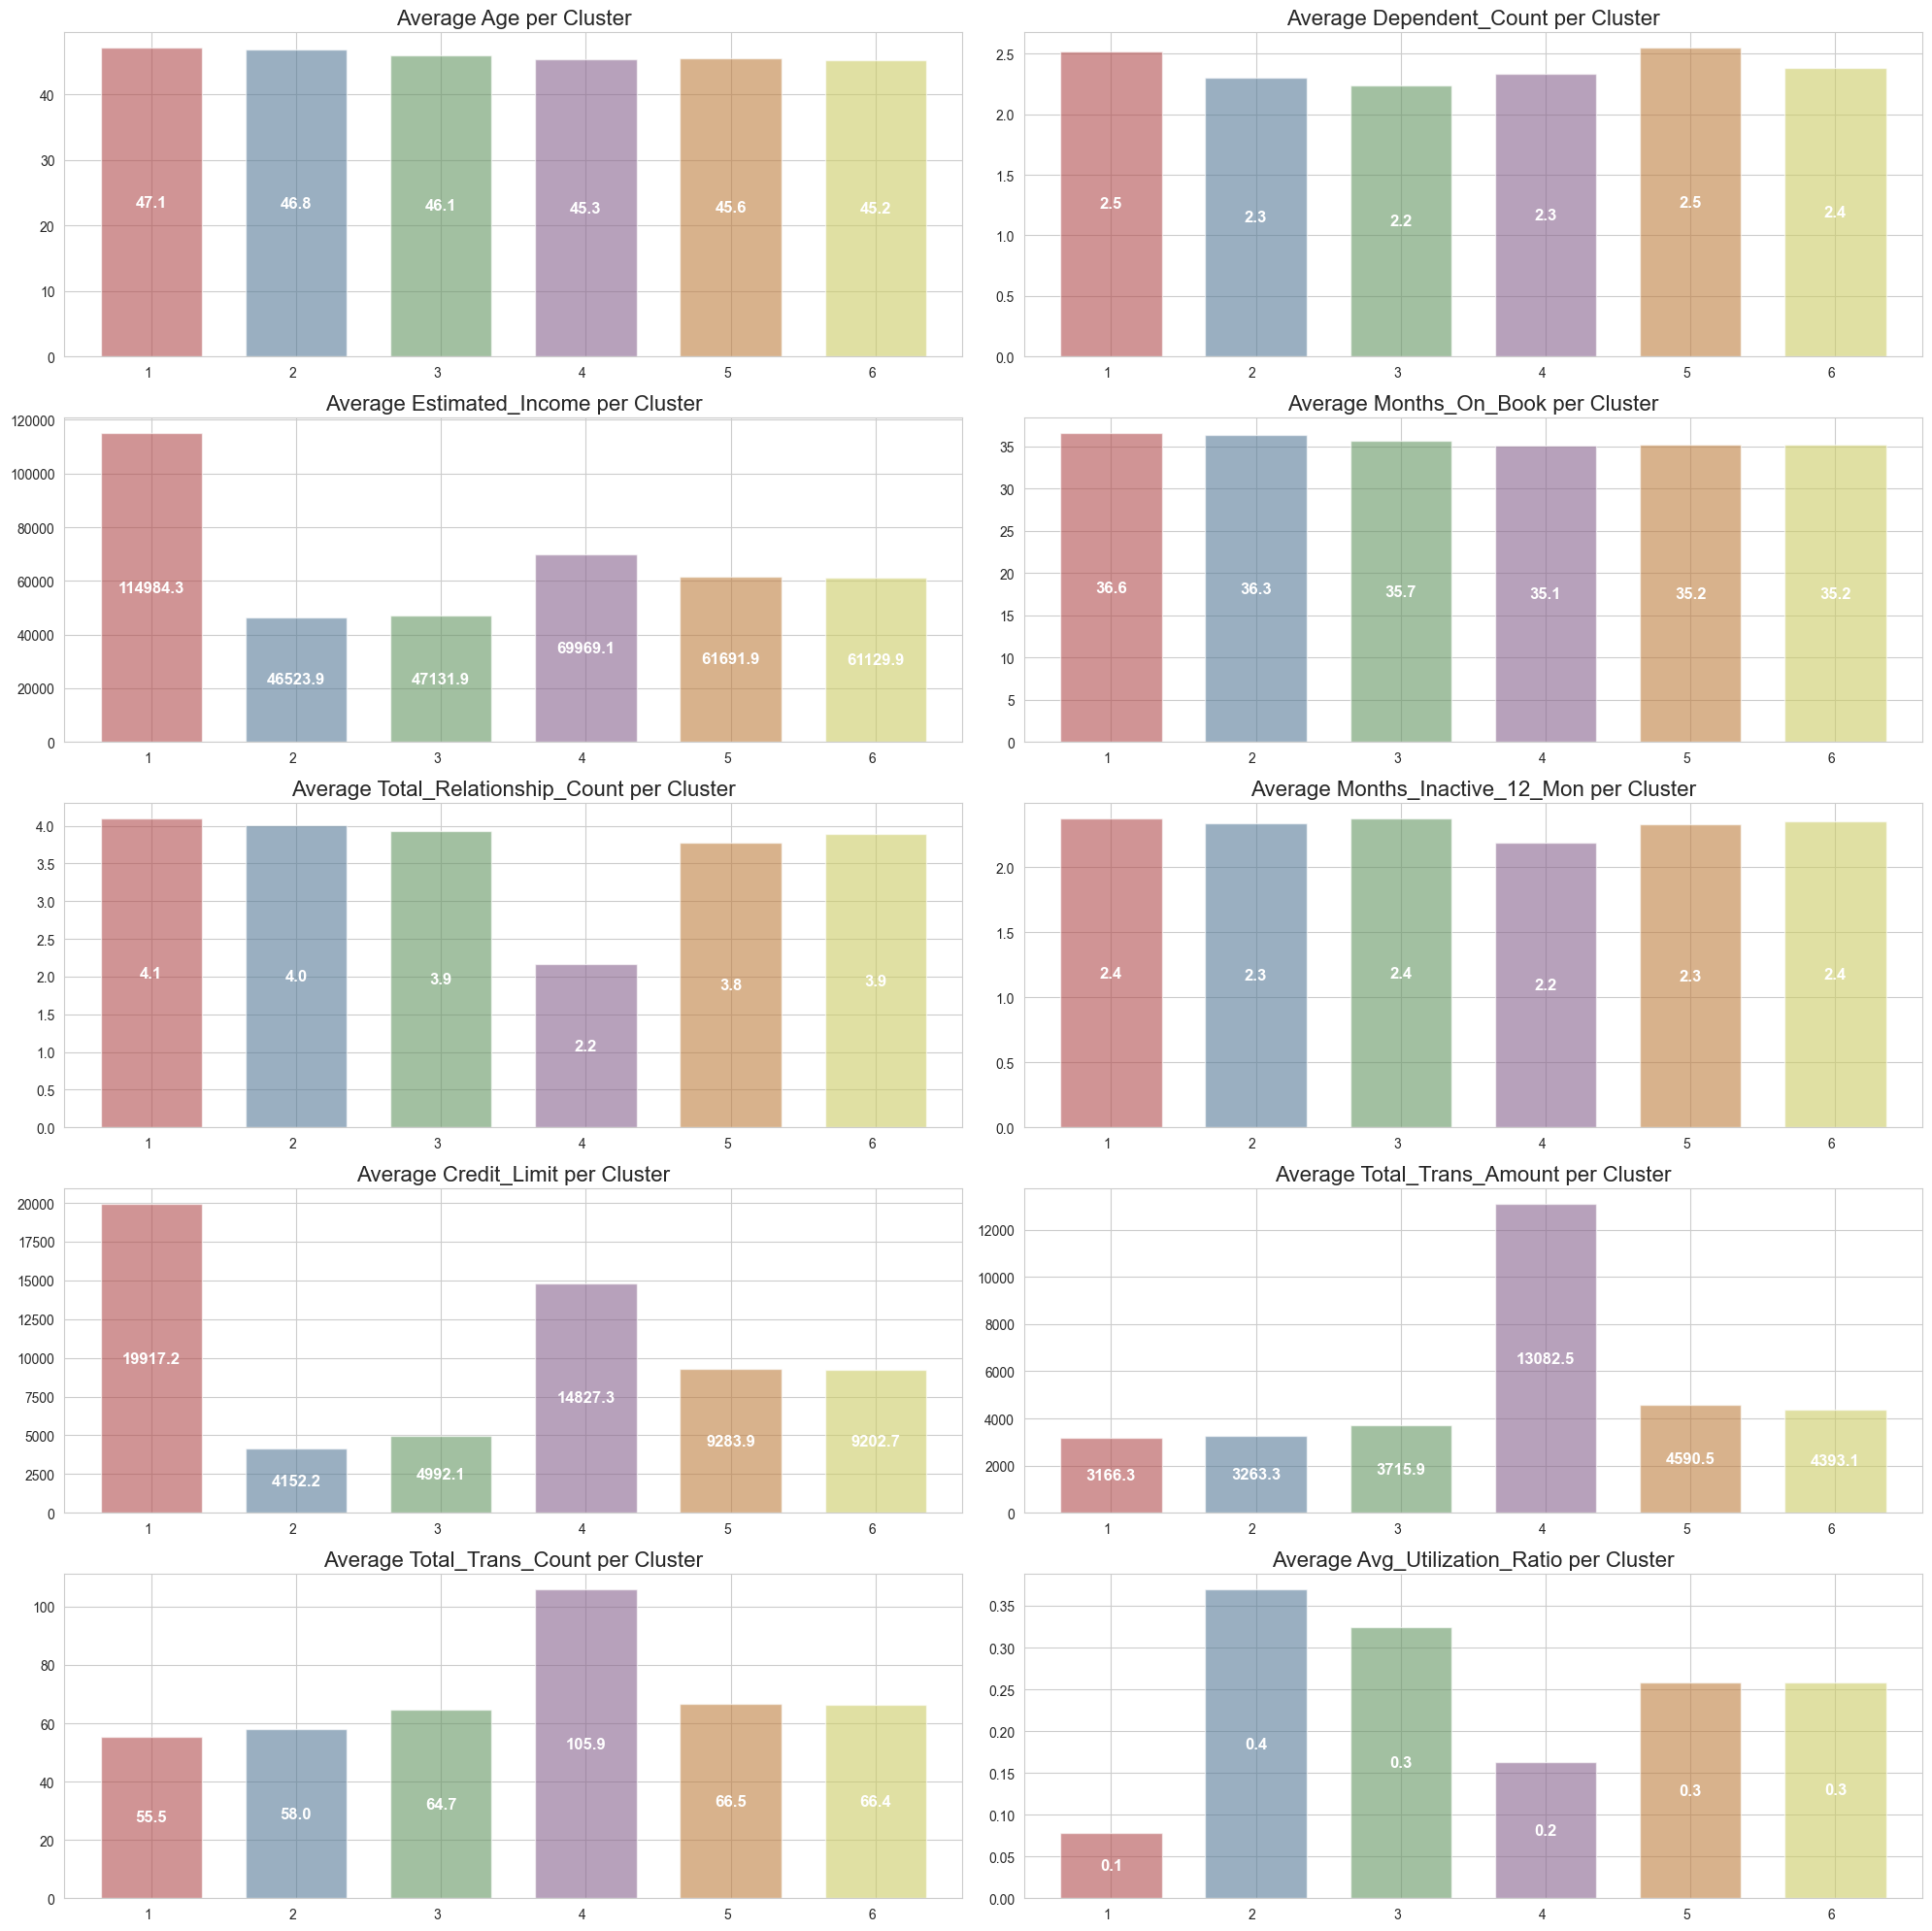

In [20]:
# list of numeric columns
num_cols = df_clean.select_dtypes(include='number').columns
# Group each numeric variable by the 'CLUSTER' column and compute the mean for each group
grouped_data = df.groupby('CLUSTER')[num_cols].mean()

# Plot a bar chart for each column
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
# Flatten axes for easy indexing
axs = axs.flatten()

for i, col in enumerate(num_cols):
    plot = grouped_data[col].plot(kind='bar', ax=axs[i], width=0.7, alpha=0.6,
                                  color=sns.color_palette('Set1', n_colors=8, desat=.5))
    plot.set_title(f'Average {col.title()} per Cluster', size=16)
    plot.set_xlabel('')
    plot.set_xticklabels(axs[i].get_xticklabels(), rotation=0, ha='right')
    
    for container in plot.containers:
        plot.bar_label(container, label_type='center', size=12, weight='bold', color='white',
                       labels=[f"{val:.1f}" if val else "" for val in container.datavalues])

plt.tight_layout()
plt.show()


General observations based on the numerical features:

- `Age`: Age is fairly standardacross the board witha an average around 45. Cluster 3 does stand out having the highest by a good amount with an average age of 57. Cluster 1 is the youngest with an average age of 43.
- `Dependent Count`: Dependent count is standard with 2.5 except for cluster 3 which has just 1.3.
- `Estimated Income`: Estimated income average is around 55,000. Cluster 2 is significantly higher with 113,558. Cluster 5 is the lowest with 47,669. 4 and 6 are nearly tied for second highest with 62,000.
- `Months on Book`: Average is around 35 months with low variability(2 months). Except cluster 3 which has 45.7 months.
- `Total Relationship Count`: Relatively even around 3.8. Cluster 3 had the highest with 4.2 and cluster 2 had the lowest with 3.5.
- `Months Inactive/12 months`: All even at 2.3 except cluster 3 has 2.4.
- `Average Credit Limit`: Average is around 5,500. Cluster 2 significantly higher than all with 23,126 followed by 4 & 6 with 9,400 and the lowest is cluster 1 with 5,000.
- `Total Trans Amount`: Average around 4,500. Cluster 2 has the highest with 6,000 and cluster 3 has the lowest with 2,635.
- `Total Trans Count`: Average around 65. Cluster 2 has the highest with 72 and cluster 3 has the lowest with 49.
- `Avg Utilization Ratio`: .3 across the board except for cluster 2 with .1

Much of the clusters hold relatively similar across the board while there are some clusters that have very distinct features. Cluster 3 has the oldest demographic and the least amount of dependents. Cluster 2 has the highest income by far, this includes the highest credit limit, trans amount and trans count. Cluster 1 & 5 has the lowest income, trans amount, and credit limit.

We'll use scatter plots to understand the distribution of variables between clusters, focusing on the highly correlated pairs of variables:

- `age` and `months_on_book`
- `total_trans_amount` and `total_trans_count`
- `credit_limit` and `estimated_income`
- `credit_limit` and `avg_utilization_ratio`

These scatter plots will help us visualize any patterns or differences between clusters with respect to these variables.

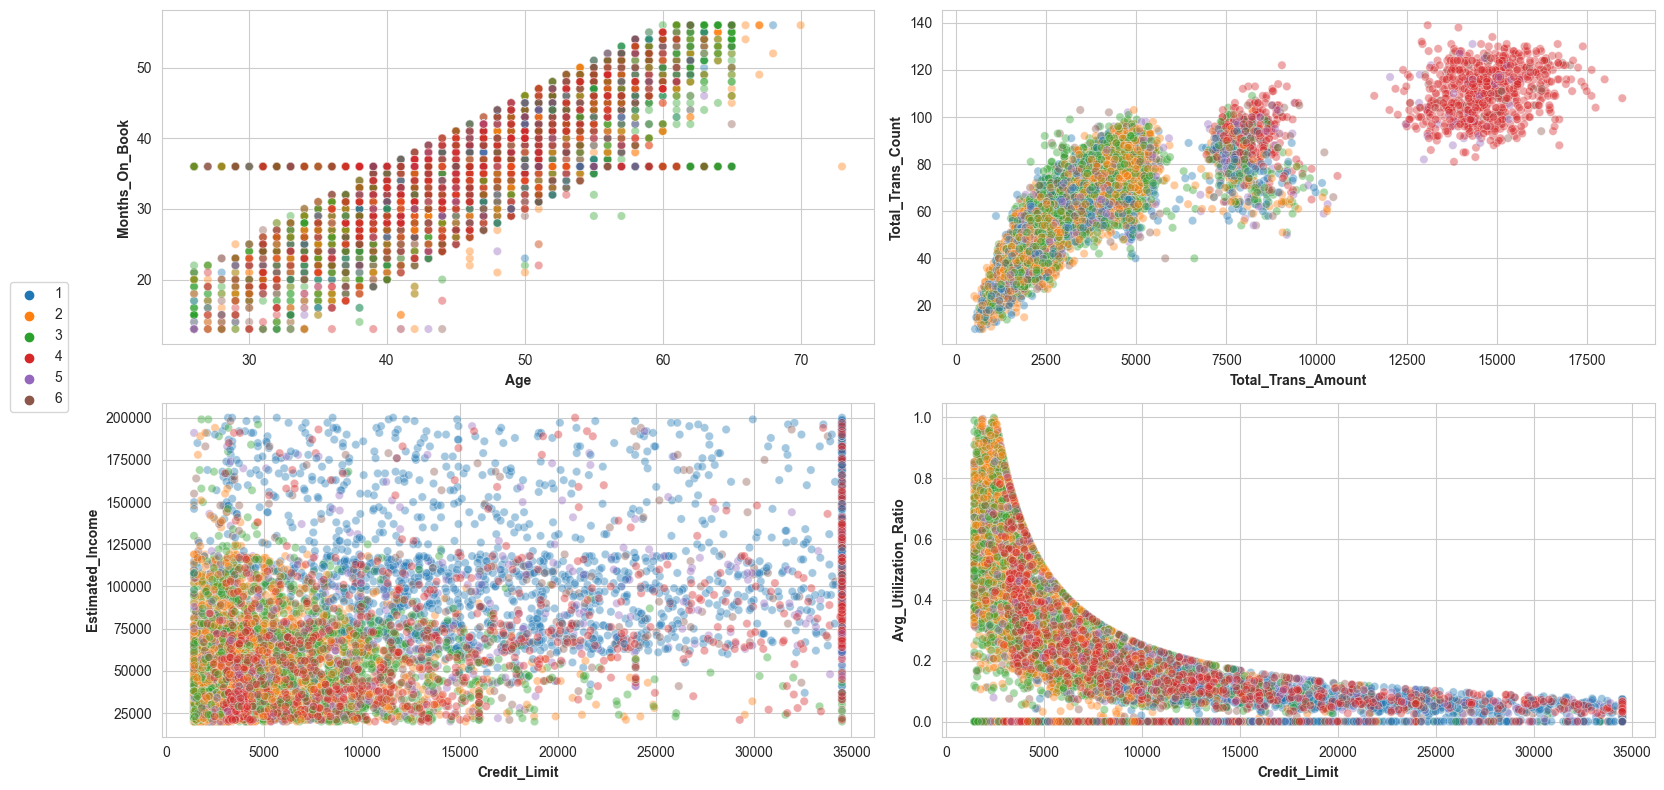

In [21]:
# Select pairs of variables with high correlation
high_corr_pairs = [('age', 'months_on_book'),
                   ('total_trans_amount', 'total_trans_count'),
                   ('credit_limit', 'estimated_income'),
                   ('credit_limit', 'avg_utilization_ratio')]

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

# Loop through pairs and create scatter plot in corresponding subplot
for i, pair in enumerate(high_corr_pairs):
    sns.scatterplot(x=pair[0], y=pair[1], data=df, hue='CLUSTER', palette='tab10', alpha=0.4, ax=axes[i])
    axes[i].set_xlabel(pair[0].title(), weight='bold')
    axes[i].set_ylabel(pair[1].title(), weight='bold')

# Create a single legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(-0.02, 0.65))

# Remove individual legends from each plot
for ax in axes:
    ax.get_legend().remove()

    
fig.tight_layout()
plt.show()

We can see some clear correlations here which strongly apply to some of the clusters

For the categorical columns, we'll plot the percentual distribution of each variable in each cluster. This will allow us to verify if a particular cluster is mostly composed of men, or of married people only, for example.

C:\Users\jdgoe\AppData\Local\Temp\ipykernel_13172\2616419216.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
C:\Users\jdgoe\AppData\Local\Temp\ipykernel_13172\2616419216.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
C:\Users\jdgoe\AppData\Local\Temp\ipykernel_13172\2616419216.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


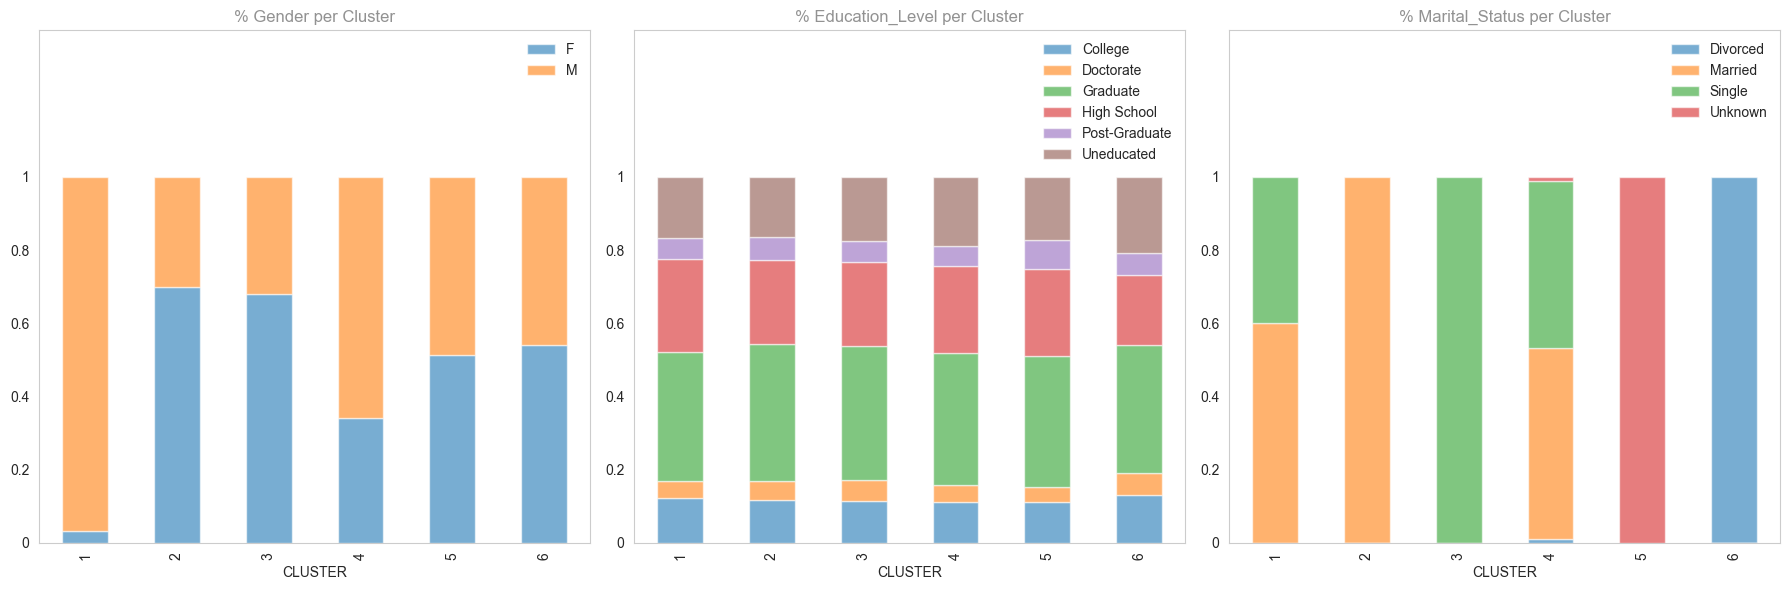

In [27]:
cat_columns = df.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=df['CLUSTER'], columns=df[col], values=df[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)
    plt.grid(visible=False)

plt.tight_layout()
plt.show()

Gender is rather equal except for cluster 1 and 4 which is male dominant. Education is fairly equal across the board. Cluster 3 is entirely singles while cluster 6 is entirely divorced, cluster 5 is fully unkown and cluster 2 is fully married, cluster 1 and 4 have an even split of single and married.

## Conclusion

Now we can generalize certain characteristics of the different clusters so the marketing teams can consider different targeting techniques for each one and or just decide which ones are worth targeting.

### Cluster 1

**Characteristics**: 
- 16% of customer base
- Youngest group, highest dependent count
- Almost entirely men
- 60% married and 40% single
- Second lowest income (49,000), lowest credit limit
- utilization ratio is on the higher end
- trans amount and count on the lower end. 

**Insight**: Target with credit building cards. Target cash back options for items that men would purchase such as tools. High dependent count so cashback for childrens items.

### Cluster 2

**Characteristics**:
- 31% of customer base
- Higher age, higher dependent count
- Entirely married, largely female
- Highest Income/ credit limit/ trans amount/count
- least utilization ratio

**Insight**: Target these cutomers with discounts for childcare items, home goods, and finer things such as dining out. Incentivize more credit utilization.

### Cluster 3

**Characterisitcs**: 
- 28% of customer base
- Oldest group, low dependent count
- decent income and time on books, average credit limit
- low transaction amount/count, highest utilization
- Entirely single/ 65/35 female

**Insight**: Target customers with discounts for single person activities/ personal items more female oriented. Credit building cards.

### Cluster 4

**Characteristics**:
- 8.5% of customer base
- above avergae dependent count
- highly male, split single and married status
- Higher income/ credit limit/ trans amount/count

**Insight**: Mix of discounts for family/individual oriented activities and items. Discounts for finer things such as dining and travel.

### Cluster 5 

**Characteristics**:
- 7% of customer base
- Lowest income, average dependent, near lowest credit limit
- lower trans amount - decent trans count, higher utilization
- split male female, unkown relationship

**Insight**: Target with credit building cards/services. 

### Cluster 6

**Characteristics**:
- 7% of customer base
- lower dependent count, split male/female, entirely divorced
- higher income/ credit limit 
- Average trans amount/count, lower utilization

**Insights**: Target with discounts for finer things/ investments. Discounts to encourage higher utilization.